<a href="https://colab.research.google.com/github/yfhkucing/latihan_dicoding/blob/master/RockPaperScissor_Muhammad_Yusuf_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library yang akan dipakai
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline
from google.colab import files
from keras import optimizers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#versi tensorflow yang digunakan
print(tf.__version__)

2.8.2


In [ ]:
#dataset yang akan digunakan
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip /content/rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [ ]:
#menghitung jumlah data
rock = os.listdir('/content/rockpaperscissors/rps-cv-images/rock')
paper = os.listdir('/content/rockpaperscissors/rps-cv-images/paper')
scissors = os.listdir('/content/rockpaperscissors/rps-cv-images/scissors')
print("data gunting ada sebanyak : "+str(len(scissors)))
print("data  batu ada sebanyak : "+str(len(rock)))
print("data kertas ada sebanyak : "+str(len(paper)))

data gunting ada sebanyak : 750
data  batu ada sebanyak : 726
data kertas ada sebanyak : 712


In [ ]:
#split data untuk training dan validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dir = '/content/rockpaperscissors/rps-cv-images'

'''data di split sebanyak 40% untuk validation, augmentasi berupa rescale dan 
horizontal flip '''

Image_Generator = ImageDataGenerator( 
                      validation_split = 0.4,
                      rescale=1./255,
                      horizontal_flip = True
                      )

Training_Data = Image_Generator.flow_from_directory(dir,
                                                    target_size=(150,150),
                                                    batch_size=4,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    subset='training')
Validation_Data = Image_Generator.flow_from_directory(dir,
                                                      target_size=(150,150),
                                                      batch_size=4,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#model yang akan dipakai
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  # Hidden layer
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# Melihat ringkasan dari model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
'''konfigurasi model untuk training. Optimizer menggunakan Adam, loss function menggunakan
categorical crossentropy, dan matriks untuk pengujian menggnakan matriks akurasi'''

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [14]:
#training model
history = model.fit(
    Training_Data, 
    validation_data  = Validation_Data,
    epochs = 50,
    steps_per_epoch = 30,
    verbose=1)

Epoch 1/50
30/30 [==============================] - 15s 526ms/step - loss: 0.4300 - accuracy: 0.8250 - val_loss: 0.3172 - val_accuracy: 0.8638
Epoch 2/50
30/30 [==============================] - 15s 528ms/step - loss: 0.2411 - accuracy: 0.9250 - val_loss: 0.3825 - val_accuracy: 0.9119
Epoch 3/50
30/30 [==============================] - 16s 530ms/step - loss: 0.3193 - accuracy: 0.8750 - val_loss: 1.3790 - val_accuracy: 0.6339
Epoch 4/50
30/30 [==============================] - 15s 527ms/step - loss: 0.4143 - accuracy: 0.8167 - val_loss: 0.4404 - val_accuracy: 0.8181
Epoch 5/50
30/30 [==============================] - 15s 523ms/step - loss: 0.2547 - accuracy: 0.9083 - val_loss: 0.2018 - val_accuracy: 0.9291
Epoch 6/50
30/30 [==============================] - 15s 522ms/step - loss: 0.2248 - accuracy: 0.9167 - val_loss: 0.1764 - val_accuracy: 0.9519
Epoch 7/50
30/30 [==============================] - 16s 535ms/step - loss: 0.2258 - accuracy: 0.9250 - val_loss: 0.1519 - val_accuracy: 0.9600

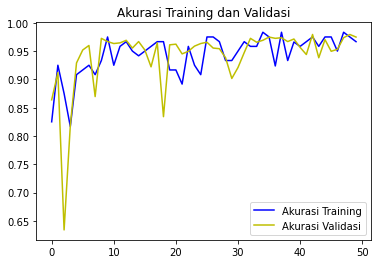

In [15]:
Akurasi_train = history.history['accuracy']
Akurasi_val = history.history['val_accuracy']

epochs = range(len(Akurasi_train))

plt.plot(epochs, Akurasi_train, 'b', label='Akurasi Training')
plt.plot(epochs, Akurasi_val, 'y', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.show()

Saving 1BqjHe5igJAgUjiN.png to 1BqjHe5igJAgUjiN (4).png
1BqjHe5igJAgUjiN.png
[[0. 1. 0.]]
1.0
Gambar terdeteksi : Kertas


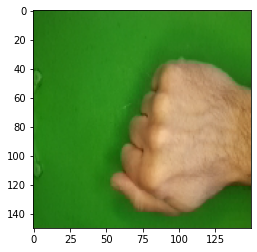

In [27]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  
  print(fn)
  print(classes)
  print(classes[0,1])
  if classes[0,0]!=1 :
    print('Gambar terdeteksi : Kertas')
  elif classes[0,1]!=1 :
    print('Gambar terdeteksi : Batu')
  else:
    print('Gambar terdeteksi : Gunting')